In [1]:
#from IPython.display import display , Math , Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Data initialization

In [55]:
w1 = 6
w0 = 0.5
n = 100
X = np.random.rand(n,)
y = w0 + w1 * X + np.random.randn(n,)*0.6


In [3]:
def linear(a):
  return w0 + w1 * a

In [ ]:
print (X.shape,y.shape)


(100,) (100,)


dividing data inta two sets

In [56]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=40)


In [15]:
print (X_train.shape,y_train.shape)
print (X_test.shape,y_test.shape)

(80,) (80,)
(20,) (20,)


checking few example

In [5]:
X_train[:5]


array([0.45886279, 0.11763693, 0.58677984, 0.98238822, 0.14195877])

In [ ]:
y_train[:5]


array([ 4.2847346 ,  4.64322822,  3.02076448, -0.7305567 ,  3.69989445])

time to make graphical visualisation

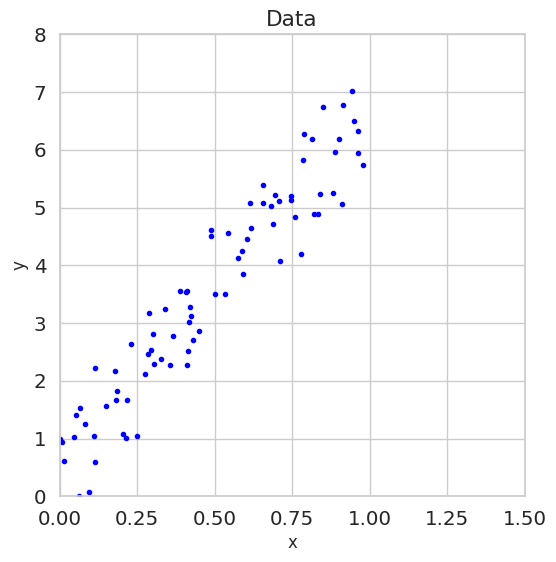

In [71]:
#sns.set_style("darkgrid")
f = plt.figure(figsize = (6,6))
sns.set_context("notebook",font_scale=1.3,rc = {"lines.linewidth":2.5})
plt.plot(X_train,y_train,".b")
plt.title("Data")
plt.grid(True)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.axis([0,1.5,0,8])
plt.show()

In [33]:
def add_dummy(t):
  return np.column_stack((np.ones(t.shape[0],),t))


In [34]:
add_dummy(np.array([[2,3], [6,4]]))

array([[1., 2., 3.],
       [1., 6., 4.]])

adding dummy to training data

In [59]:
X_train_dummy = add_dummy(X_train)
X_test_dummy = add_dummy(X_test)
print(X_train_dummy[:5])

[[1.         0.50296001]
 [1.         0.14880254]
 [1.         0.18334577]
 [1.         0.65502927]
 [1.         0.11435128]]


Model formataion

In [36]:
def predict(X , w):
  assert X.shape[-1] == w.shape[0]
  return X @ w

In [37]:
w = np.random.rand(2,)
w

array([0.1051734 , 0.43306586])

Loss function

In [38]:
def loss (x,y,w):
  e = (predict(x,w) - y)
  return 0.05*(np.transpose(e) @ e)

In [51]:
loss(X_train_dummy,y_train,w)

np.float64(3.1734251088248997)

optimization

In [40]:
def gradient(x,y,w):
  return np.transpose(x) @ (predict(x,w) - y)

In [41]:
grad= gradient(X_train_dummy,y_train,w)

In [42]:
def update_wieghts(w,grad,lr):
  return w - lr * grad

In [61]:
w = np.random.rand(X_train_dummy.shape[1],)
loss_all= []
epoch = []
for i in range (1,200):
  grad = gradient(X_train_dummy,y_train,w)
  w = update_wieghts(w,grad,0.005)
  if (i % 10 == 0):
       epoch.append(i)
       loss_all.append(loss(X_train_dummy,y_train,w))
       print (w,loss(X_train_dummy,y_train,w))


[2.28864437 2.83088422] 4.722674906493359
[1.89689858 3.58820172] 3.2794106908081364
[1.59593835 4.16559072] 2.43776735969523
[1.36610723 4.60651511] 1.9469487032586708
[1.19059584 4.94322867] 1.660719436525422
[1.0565659  5.20036124] 1.4937999601357905
[0.95421344 5.3967215 ] 1.3964580219189866
[0.8760516  5.54667274] 1.3396914112109237
[0.81636301 5.66118357] 1.3065869944475788
[0.7707816  5.74863019] 1.287281589464407
[0.73597319 5.81540913] 1.2760233134395311
[0.70939161 5.86640512] 1.2694578578501359
[0.68909249 5.9053484 ] 1.2656291004985594
[0.67359099 5.93508758] 1.2633962953782376
[0.66175321 5.95779802] 1.2620941970085706
[0.65271325 5.97514093] 1.2613348561467743
[0.64580985 5.98838491] 1.2608920335783527
[0.64053804 5.99849872] 1.2606337940485586
[0.6365122  6.00622217] 1.2604831972644204


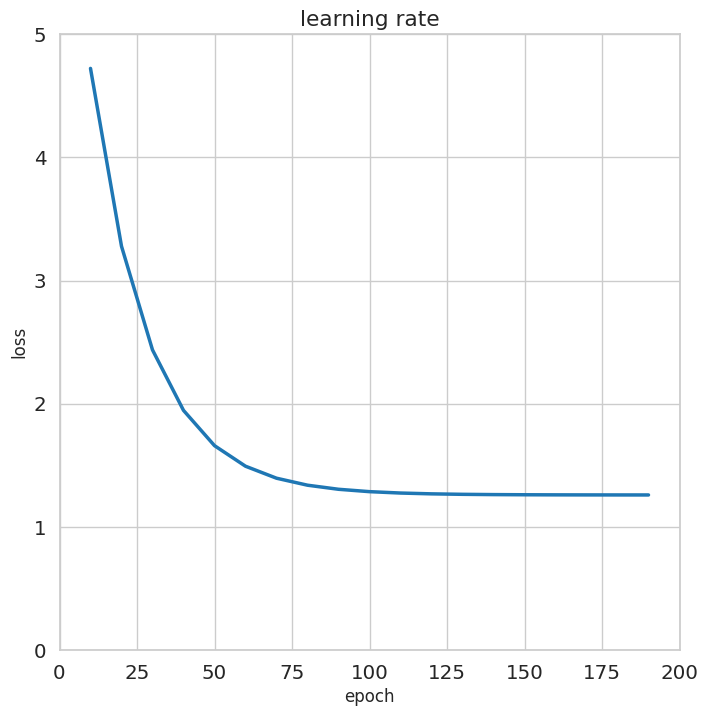

In [64]:
sns.set_style("whitegrid")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook",font_scale=1.3,rc = {"lines.linewidth":2.5})
plt.plot(epoch,loss_all)
plt.title("learning rate")
plt.grid(True)
plt.xlabel("epoch", fontsize = 12)
plt.ylabel("loss", fontsize = 12)
plt.axis([0,200,0,5])
plt.show()

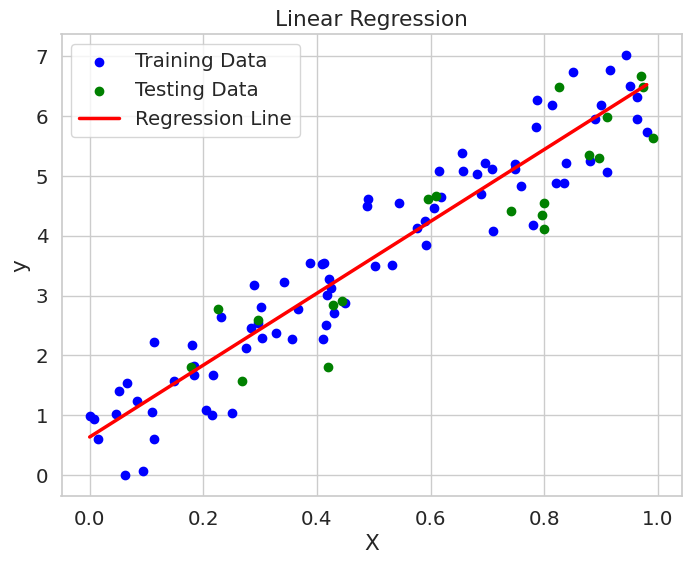

In [65]:
# prompt: write a code for graphical representation of above model

from IPython.display import display , Math , Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ... (rest of your existing code)

# Assuming 'w' is your final optimized weight vector
# and X_train_dummy, y_train are your training data with dummy variable

# Create a range of x values for plotting the regression line
x_range = np.linspace(X_train.min(), X_train.max(), 100)  # Use min/max from training data
x_range_dummy = add_dummy(x_range)


y_pred = predict(x_range_dummy, w) # Predict the y values for the regression line

# Plot the data points
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Testing Data', color='green') # Plot testing points


# Plot the regression line
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()
